# Neural Networks & Back Propagation

## Objectives

* Explain the basic neural-network algorithms
    - types of layers/neurons
    - what are activation functions
    - what are fully connected networks
* Explain the back propagation process
* Build a simple neural network in keras

Let's start off with imports. 

## Direct Installation

```pip install tensorflow```


In [3]:
%matplotlib inline
from sklearn.model_selection import train_test_split

import numpy as np
import numpy.random as rand
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## What are Neural Networks?

Neural Networks were originally developed in the 1950's using the neurons in the brain as inspiration.

In the brain, we have neurons connected together by dendrons of different strengths, and the strengths of the connections change as we learn. The connections are nonlinear; a neuron doesn't activate at all until it has sufficient input.

But don't get too caught up in the analogy. Brains are an inspiration, not a model, and trying to fit to closely to them hasn't always helped researchers.

### Terminology

'neural network' and 'deep learning' will be used interchangeably throughout the lecture. The latter is moving away from the idea that these are based on the brain, and in part to emphasize the depth that's become possible. Sometimes people talk about 'artificial neural networks' to distinguish them from the biological ones. And a couple decades ago the terms 'connectionism' and '[parallel distributed processing](https://mitpress.mit.edu/books/parallel-distributed-processing)' were popular. 

As deep learning is a relatviely young field, the libraries and tools are changing quickly, e.g., Theano (MILA led by Yoshua Bengio) retired in 2017 and revived recently, January 2019. Assume that whatever specific software you learn today can be obsolete in a year or two. The most impoartant thing is to understand the underlying concepts, the fundamentals, and you can create your own library on top of either Tensorflow or Pytorch that caters to your practical needs.

_"I learned very early the difference between knowing the name of something and knowing something". - Richard P. Feynman_

### Why Neural Networks?

Neural networks perform well with high-dimensional (**unstructured**) data such as images, audio, and text (AI is believed to be the new electricity).
<font color=white>Question: why are these data high dimensional?</font>

Disadvantages

 * Hard to design and tune
 * Seriously, really hard to design and tune
 * Slow to train
 * Many local minima
 * Uninterpretable
 * Easy to overfit (need a lot of data)
 
Advantange

 * Works well with high-dimensional data
 * Can find almost anything, when designed correctly
 * Online training
 

### History

Stage 1: ('40s-'60s) Early understanding of the brain and development of computers 

Stage 2: ('80s-'90s) Understanding of backpropagation, recognition that neural networks could be used for associative memory, first recurrent neural networks

Stage 3: (2006-) Growth of GPUs, better algorithms for training deep networks, more designs, more data

### Interactive Demonstration

- https://playground.tensorflow.org/

### What is a neural network?

**Example 1: single neural network**

Say we want to predict the house price based on the size of the house and assume that the relationship is linear. What do we do?

- it is essential a linear regression problem
- yet prices cannot be negative, so we apply a function called Rectified Linear Unit (`ReLU`,  you will see it again in ConvNet)

In [6]:
y = np.linspace(0, 10, num=10) * 0.5 + rand.normal(.3, .5, 10)
print(y)
y = np.maximum(y,0) ## relu 
y

[0.49778467 1.00522867 0.83342234 1.8157964  2.91147908 2.86659335
 3.77910133 4.21190808 4.48061939 5.47314046]


array([0.49778467, 1.00522867, 0.83342234, 1.8157964 , 2.91147908,
       2.86659335, 3.77910133, 4.21190808, 4.48061939, 5.47314046])

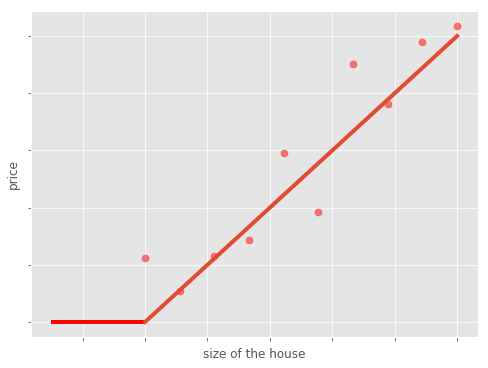

In [7]:
## size of house vs price
np.random.seed(seed=1)

f = lambda x:  .5*x # line
X = np.linspace(0, 10, num=10)
true_y = f(X) 
y = true_y + rand.normal(.3, .5, 10)
y = np.maximum(y,0) ## relu 

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X, y, s =50, color="r", alpha = .5) ## plot observations
## Visualize ReLU
ax.plot(X, true_y, linewidth=4); ax.hlines(0, xmin = -3, xmax = 0, color="r", linewidth=4) 

ax.set_xticklabels([]); ax.set_yticklabels([])
ax.set_xlabel("size of the house"); _ = ax.set_ylabel("price")

![layers](images/house_1_1_1.png)

What do we see here?
- The input is the size of the house ($x$)
- output is the price ($y$)
- the "neuron" is "activated" by function ReLU (thick red line) 

---

**Example 2 - Multiple neural network**

Various factors can influence the price of a house besides the size. It could be the number of bed/bathrooms, air pollution, and the crime rate. Then the NN, to predict the price, will automatically generate hidden units, i.e., we only need to supply the inputs $X$ and the output $y$.  

![layers](images/house_4_3_1.png)

## NN Representation

So we see neural network can be expressed as a directed graph. The nodes of the graph are neurons. Neurons can either be **input**, **hidden**, or **output** neurons. The input nodes are set to the feature, and (once all the calcuations are done) the value of the output nodes will be the predicted labels.

The connections between the neurons are either **weights** or **activation functions**. If the connections into a neuron are weights, then the value for that neuron is the sum over all incoming connects of the weight times the value of the previous neuron.

Let us consider the 2-layer NN shown above (_normally you see $a$ as a scalar, $A$ a matrix, and $\vec{a}$ for a vector, yet I'm dropping $\vec{\cdot}$ for better demonstration. You will see later that we use superscript to indicate layers and subscript to index the neurons in each layer. The notation will get hairy_)
- Input layer $a^{[0]} = X$ $ \in \mathbb R^4$
- Hidden layer $a^{[1]}$:
$$ a^{[1]} = 
\begin{bmatrix} 
a_1^{[1]} \\
a_2^{[1]} \\
a_3^{[1]} 
\end{bmatrix}
$$
 the hidden layer, constructed by stacking neurons/perceptrons together, is also known as **Dense layer** in modern deep learning terminology.
 
- Output layer $a^{[2]} = \hat y$
- weights $w^{[{\rm layer}]}$

**dimensions! dimensions! dimensions!**

![layers](images/house_4_3_1_a.png)

## Computing a neural network's output (feed-forward)

What is happening in each neuron? Two steps:

- Step I $$z =  w^T x + b$$
- Step II $$a = \sigma(z) $$

where $b$ are the intercepts and $\sigma(\cdot)$ is activation function, we will get to that later. 

![layer](images/house_4_3_1_a_action.png)

So in the neuron $a_1^{[1]}$, what took place is that 
$$z_1^{[1]}= w_1^{[1]}x + b_1^{[1]}, 
\quad
a_1^{[1]}  = \sigma(z_1^{[1]})
$$


**white boarding:** come compute the next neuron $a_2^{[1]}$

---

So we have 
\begin{align}
z_1^{[1]} &= w_1^{[1]}x + b_1^{[1]}, \quad a_1^{[1]}  = \sigma(z_1^{[1]})
\\
z_2^{[1]} &= w_2^{[1]}x + b_2^{[1]}, \quad a_2^{[1]}  = \sigma(z_2^{[1]})
\\
z_3^{[1]} &= w_3^{[1]}x + b_3^{[1]}, \quad a_3^{[1]}  = \sigma(z_3^{[1]})
\end{align}


Given input $x$, we can vectorize the process in from layer 0 to 1:
\begin{align}
z^{[1]} 
& = 
\begin{bmatrix} w_1^{[1]T}  \\w_2^{[1]T}\\w_3^{[1]T}\end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix} + 
\begin{bmatrix} b_1^{[1]} \\ b_2^{[1]} \\ b_3^{[1]}  \end{bmatrix} 
= 
\begin{bmatrix} 
w_1^{[1]T} x_1 + b_1^{[1]}\\
w_2^{[1]T} x_2 + b_2^{[1]}\\
w_3^{[1]T} x_3 + b_3^{[1]}\end{bmatrix}
= 
\begin{bmatrix} z_1^{[1]} \\ z_2^{[1]} \\ z_3^{[1]}  \end{bmatrix} 
\\
& = {W^{[1]}}^T x^{[1]} + b^{[1]}\\
a^{[1]} & = \sigma(z^{[1]})
\end{align}

---
Matrix makes our life easy!!! Bye, for-loop, you won't be missed.

Now given input $x$, we can simplify the training this 2-NN as follows:
\begin{align}
z^{[1]} & = W^{[1]} x + b^{[1]} \quad a^{[1]} = \sigma(z^{[1]} )
\\
z^{[2]} & = W^{[2]} a^{[1]} + b^{[2]} \quad \hat y = a^{[2]} = \sigma(z^{[2]} )
\end{align}

Then how do we find those weights? How did you do in linear or logistic regression?

## Activation functions

### Sigmoid

You've seen it, it was used in logistic regression and was referred as link function by statisticians. 
$$\sigma = \frac{1}{1 +  \exp(-z)}$$

**question**: why do we want to use this?

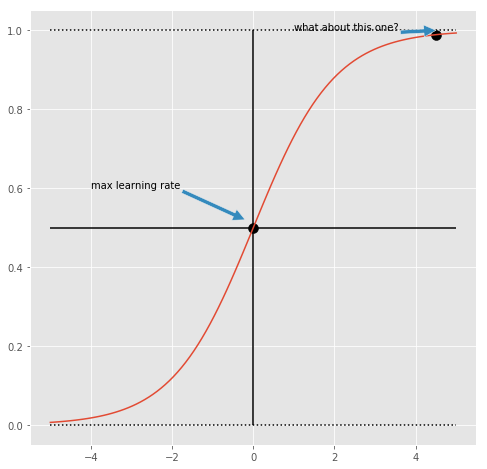

In [11]:
## plot sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

xpts = np.linspace(-5, 5, 100)
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(xpts, sigmoid(xpts))
ax.hlines(0.5, -5, 5)
ax.vlines(0, 0, 1.0)
ax.hlines(y = 1, xmin = -5, xmax = 5, linestyles = "dotted")
ax.hlines(y = 0, xmin = -5, xmax = 5, linestyles = "dotted")

ax.set_title("")
## point I 
ax.scatter(0, sigmoid(0), s=100, color = "k")
ax.annotate('max learning rate', 
            xy = (-.2, .52), xycoords='data',
            xytext = (-4, .6), textcoords='data',
            arrowprops=dict(connectionstyle="arc3"))
## point II
ax.scatter(4.5, sigmoid(4.5), s=100, color = "k")
_ = ax.annotate('what about this one?', 
            xy = (4.5, 1), xycoords='data',
            xytext = (1, 1), textcoords='data',
            arrowprops=dict(connectionstyle="arc3"))

Nice properties:
- range between 0 and 1 and we want to predict probability as output
- differentiable
- monotonic

Drawback:
- get stuck during training

The **softmax** function is a more generalized logistic activation function which is used for multiclass classification.
$$\sigma (\boldsymbol z)_j = \frac{\exp(z_j)}{\sum_{j=1}^K \exp(z_j)} \quad \text{for } j = 1, \dots, K \text{ and } \boldsymbol z \in \mathbb R^K$$

### hyperbolic tangent 

$$\tanh(z) = \frac{\exp(z) - \exp(-z)}{\exp(z) + \exp(-z)}$$

Very similar to sigmoid, differentiable, monotonic, so why do we care? 

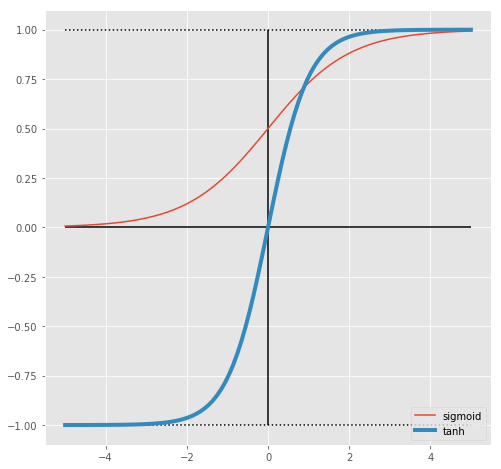

In [12]:
## compare sigmoind against hyperbolic tangent
xpts = np.linspace(-5, 5, 100)

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(xpts, sigmoid(xpts), label = "sigmoid")
ax.plot(xpts, np.tanh(xpts), label = "tanh", lw = 4)
ax.legend(loc = "lower right")

ax.hlines(0, -5, 5)
ax.vlines(0, -1, 1)

ax.hlines(y = 1, xmin = -5, xmax = 5, linestyles = "dotted")
_ = ax.hlines(y = -1, xmin = -5, xmax = 5, linestyles = "dotted")

### ReLU

We just saw it in the example 1. Probably the most popular activation function now. Can you figure why? (hint: gradient descent)

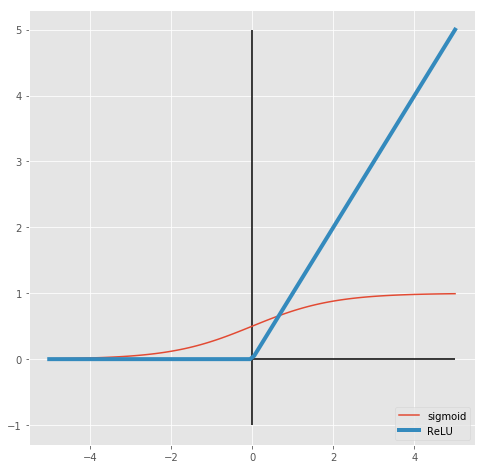

In [13]:
## sigmoid vs relu
xpts = np.linspace(-5, 5, 100)

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(xpts, sigmoid(xpts), label = "sigmoid")
ax.plot(xpts, np.maximum(xpts, 0), label = "ReLU", lw = 4)
ax.legend(loc = "lower right")

ax.hlines(0, -5, 5)
_ = ax.vlines(0, -1, 5)

## Backpropagation

<img src="images/backprop.png" alt="Drawing" style="width: 800px;"/>
source: Andrew Ng's note


So far we've talked about the structure, neurons, activation functions of NN, but how exactly are we training the model, i.e., what do we do to minimize the difference between the output of a neural network (i.e., predicted value) and the observed values? The missing link is backprop. 

Calculating the output based on the inputs is sometimes called **forward propagation**, in which the signal is propagated from one layer to the next. To update the weights in the model we use an algorithm called **backpropagation**. And it is done by using backpropagated gradients using the chain rule and optimized using an optimization algorithm.

In this, we compare the predicted output with the expected value for a set of inputs to find the output error, and propagate the error backwards, from one layer to the previous one, based on the gradient of the intervening functions and weights. Once we have the error at each node we can use gradient descent or some related algorithm to adjust the weights at that node.

If you're interested, read [Learning representations by back-propagating erros on Nature that Geoffrey Hinton co-authored in 1986](http://www.iro.umontreal.ca/~pift6266/A06/refs/backprop_old.pdf), 4-page long. Or [Jeff's lecture](https://github.com/GalvanizeDataScience/DSI_Lectures/blob/master/neural-network/jfomhover/Perceptron%20-%20Notes%20-%20v3.ipynb) does a great job exploring that in more detail. 

Though TensorFlow (or any other NN framework) all take care of that automatically, it's an important algorithm that was critical to the development of NN and at some point it's worth studying.

## Fully Connected Networks

Much of the challenge of creating neural networks is deciding how to organize the nodes. The simplest type is called a **fully connected network**, in which nodes are organized into layers. Each layer (after the input) is a fully connected layer, with each of its nodes connected to the each node in the previous. Each layer may have an associated activation function, which is used for each node in the layer.

The more hidden layers a network has, the more powerful it is and the more it can predict. But it will also be slower to train and easier to overfit.

## Building a simple NN in Keras/Tensorflow

We'll use `keras`, a powerful and easy-to-use python library for creating neural networks. It can run on top of either of a couple of backends, TensorFlow and Theano; and now (since tf.2.x) it is built under TensorFlow.

Let's start making a simple predictive model, on some data we can understand. Usually neural networks are used for fancier stuff, but this is just a simple 1-feature regression problem.

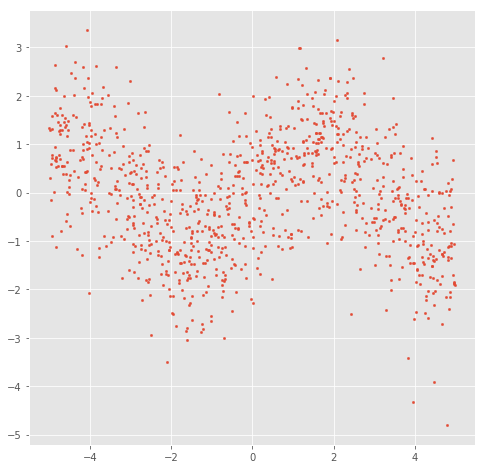

In [15]:
np.random.seed(seed=123)
npts = 1000
x_train = stats.uniform(-5, 10).rvs(npts)
y_train = np.sin(x_train) + stats.norm(0, 1.0).rvs(npts)
fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(x_train, y_train, s=5);

In [16]:
import tensorflow as tf
from tensorflow.keras import layers
keras = tf.keras
print(tf.__version__)
print(tf.keras.__version__)

2.0.0-alpha0
2.2.4-tf


The basic object in keras is called a `model`; you create a model first and add layers onto it. The simplest one to use is a `Sequential` model, which is just a bunch of layers. Let's make one of those.

In [28]:
model = keras.models.Sequential()

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


To start off we'll make the simplest network we can, without any hidden layers, just a single output layer. We need to specify the number of `units` in that layer (1) as well as the number of input units with `input_dim` (also 1).

In [29]:
model.add(keras.layers.Dense(units=1, input_dim=1))

That's it - we built a neural network! Now we compile it (specifying `loss` function and other things).

In [30]:
model.compile(loss='mean_squared_error', optimizer='sgd')

Finally, we fit the model. We train the data in batches of multiple points at once, running through the entire dataset (epochs) several times.

In [32]:
# %%capture

model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 0s 81us/sample - loss: 4.8987
Epoch 2/10
1000/1000 [==============================] - 0s 33us/sample - loss: 2.6471
Epoch 3/10
1000/1000 [==============================] - 0s 38us/sample - loss: 1.8756
Epoch 4/10
1000/1000 [==============================] - 0s 32us/sample - loss: 1.6070
Epoch 5/10
1000/1000 [==============================] - 0s 30us/sample - loss: 1.5136
Epoch 6/10
1000/1000 [==============================] - 0s 30us/sample - loss: 1.4787
Epoch 7/10
1000/1000 [==============================] - 0s 30us/sample - loss: 1.4663
Epoch 8/10
1000/1000 [==============================] - 0s 32us/sample - loss: 1.4611
Epoch 9/10
1000/1000 [==============================] - 0s 30us/sample - loss: 1.4597
Epoch 10/10
1000/1000 [==============================] - 0s 29us/sample - loss: 1.4591


Let's make a picture!

Our data only range from -5 to 5, but we'll plot a bit beyond that. We'll make a function since we'll do this a few times.

In [33]:
def plot_results(model, ax=None, function=np.sin, xlim=(-7, 7)):
    x_actual = np.linspace(*xlim, 500)
    y_actual = function(x_actual)

    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 5))

    y_pred = model.predict(x_actual)
    ax.plot(x_actual,y_pred, 'r-', label='model predictions')
    ax.plot(x_actual,y_actual, 'b-', lw=1, label='actual expected values')

    ax.axvline(-5, color='k', label='limits of data')
    ax.axvline(5, color='k')
    ax.set_xlim(xlim)
    ax.legend()  

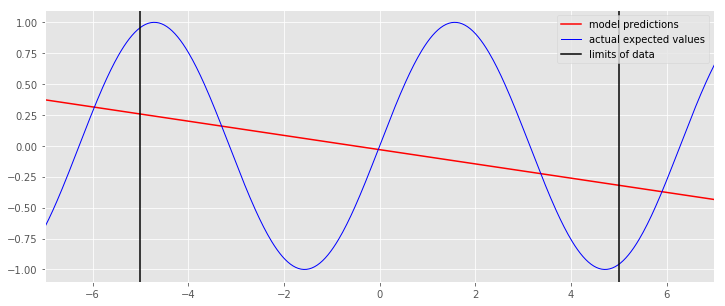

In [34]:
fig,ax = plt.subplots(figsize=(12,5))
plot_results(model, ax=ax)

So we basically just did linear regression.

Let's make a new model.

In [35]:
model_hidden_layer = keras.models.Sequential()

Now we'll add a layer to it, taking us from a single input unit to 5 hidden units.

In [36]:
n_hidden = 5
model_hidden_layer.add(keras.layers.Dense(units=n_hidden, input_dim=1))

In [37]:
model_hidden_layer.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 5)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


A second layer will connect use to the output with a single output value. Note we do not need to specify the `input_dim` since it's inferred from the previous layer.

In [38]:
model_hidden_layer.add(keras.layers.Dense(units=1))

In [39]:
model_hidden_layer.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


We then compile the model and fit it, as before, and plot the results.

Epoch 1/5
1000/1000 [==============================] - 0s 130us/sample - loss: 3.2369
Epoch 2/5
1000/1000 [==============================] - 0s 47us/sample - loss: 1.4706
Epoch 3/5
1000/1000 [==============================] - 0s 44us/sample - loss: 1.4616
Epoch 4/5
1000/1000 [==============================] - 0s 34us/sample - loss: 1.4616
Epoch 5/5
1000/1000 [==============================] - 0s 32us/sample - loss: 1.4609


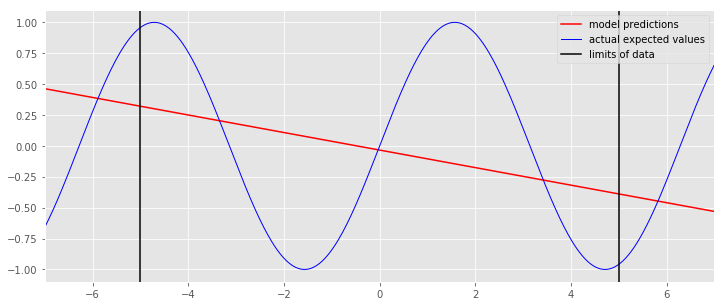

In [40]:
model_hidden_layer.compile(loss='mean_squared_error', optimizer='sgd')
model_hidden_layer.fit(x_train, y_train, epochs=5, batch_size=32)
fig,ax = plt.subplots(figsize=(12,5))
plot_results(model_hidden_layer, ax=ax)

What went wrong?

--- 

**Activation units** The problem is that our network is completely linear, so no matter what the weights the output is a linear function of the input. In order to fix this, we need to provide some sort of non-linear function at each of the layers.

To add an activation function in keras, we just add it as an additional layer.

Epoch 1/50
1000/1000 [==============================] - 0s 81us/sample - loss: 2.6757
Epoch 2/50
1000/1000 [==============================] - 0s 33us/sample - loss: 2.1316
Epoch 3/50
1000/1000 [==============================] - 0s 33us/sample - loss: 1.8740
Epoch 4/50
1000/1000 [==============================] - 0s 32us/sample - loss: 1.7309
Epoch 5/50
1000/1000 [==============================] - 0s 32us/sample - loss: 1.6399
Epoch 6/50
1000/1000 [==============================] - 0s 32us/sample - loss: 1.5802
Epoch 7/50
1000/1000 [==============================] - 0s 32us/sample - loss: 1.5384
Epoch 8/50
1000/1000 [==============================] - 0s 32us/sample - loss: 1.5102
Epoch 9/50
1000/1000 [==============================] - 0s 35us/sample - loss: 1.4891
Epoch 10/50
1000/1000 [==============================] - 0s 33us/sample - loss: 1.4734
Epoch 11/50
1000/1000 [==============================] - 0s 33us/sample - loss: 1.4637
Epoch 12/50
1000/1000 [=============================

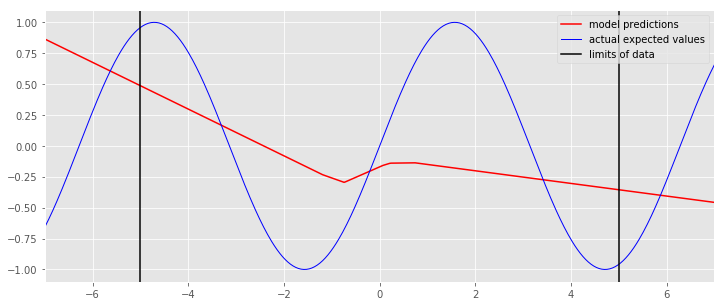

In [52]:
n_hidden = 5

model_activation = keras.models.Sequential()
model_activation.add(keras.layers.Dense(n_hidden, input_dim=1))
model_activation.add(keras.layers.Activation(tf.nn.relu))
model_activation.add(keras.layers.Dense(1))

model_activation.compile(loss='mean_squared_error', optimizer='sgd')
model_activation.fit(x_train, y_train, epochs=50, batch_size=32, verbose = 1)
fig,ax = plt.subplots(figsize=(12,5))
plot_results(model_activation, ax=ax)

Epoch 1/250
1000/1000 [==============================] - 0s 84us/sample - loss: 2.4613
Epoch 2/250
1000/1000 [==============================] - 0s 40us/sample - loss: 2.0720
Epoch 3/250
1000/1000 [==============================] - 0s 37us/sample - loss: 1.8366
Epoch 4/250
1000/1000 [==============================] - 0s 33us/sample - loss: 1.7046
Epoch 5/250
1000/1000 [==============================] - 0s 34us/sample - loss: 1.6214
Epoch 6/250
1000/1000 [==============================] - 0s 34us/sample - loss: 1.5718
Epoch 7/250
1000/1000 [==============================] - 0s 35us/sample - loss: 1.5402
Epoch 8/250
1000/1000 [==============================] - 0s 35us/sample - loss: 1.5224
Epoch 9/250
1000/1000 [==============================] - 0s 35us/sample - loss: 1.5103
Epoch 10/250
1000/1000 [==============================] - 0s 35us/sample - loss: 1.5019
Epoch 11/250
1000/1000 [==============================] - 0s 34us/sample - loss: 1.4971
Epoch 12/250
1000/1000 [=================

Epoch 94/250
1000/1000 [==============================] - 0s 32us/sample - loss: 1.4792
Epoch 95/250
1000/1000 [==============================] - 0s 32us/sample - loss: 1.4791
Epoch 96/250
1000/1000 [==============================] - 0s 31us/sample - loss: 1.4791
Epoch 97/250
1000/1000 [==============================] - 0s 32us/sample - loss: 1.4790
Epoch 98/250
1000/1000 [==============================] - 0s 32us/sample - loss: 1.4790
Epoch 99/250
1000/1000 [==============================] - 0s 30us/sample - loss: 1.4790
Epoch 100/250
1000/1000 [==============================] - 0s 32us/sample - loss: 1.4788
Epoch 101/250
1000/1000 [==============================] - 0s 31us/sample - loss: 1.4787
Epoch 102/250
1000/1000 [==============================] - 0s 32us/sample - loss: 1.4786
Epoch 103/250
1000/1000 [==============================] - 0s 32us/sample - loss: 1.4786
Epoch 104/250
1000/1000 [==============================] - 0s 32us/sample - loss: 1.4785
Epoch 105/250
1000/1000 [==

1000/1000 [==============================] - 0s 32us/sample - loss: 1.4743
Epoch 187/250
1000/1000 [==============================] - 0s 32us/sample - loss: 1.4743
Epoch 188/250
1000/1000 [==============================] - 0s 31us/sample - loss: 1.4742
Epoch 189/250
1000/1000 [==============================] - 0s 31us/sample - loss: 1.4740
Epoch 190/250
1000/1000 [==============================] - 0s 32us/sample - loss: 1.4740
Epoch 191/250
1000/1000 [==============================] - 0s 32us/sample - loss: 1.4740
Epoch 192/250
1000/1000 [==============================] - 0s 32us/sample - loss: 1.4740
Epoch 193/250
1000/1000 [==============================] - 0s 33us/sample - loss: 1.4739
Epoch 194/250
1000/1000 [==============================] - 0s 30us/sample - loss: 1.4739
Epoch 195/250
1000/1000 [==============================] - 0s 31us/sample - loss: 1.4739
Epoch 196/250
1000/1000 [==============================] - 0s 32us/sample - loss: 1.4739
Epoch 197/250
1000/1000 [==========

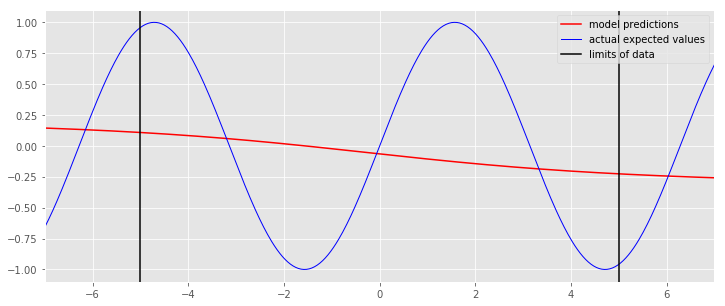

In [56]:
model_activation = keras.models.Sequential()
model_activation.add(keras.layers.Dense(units=25, input_dim=1, activation=tf.nn.sigmoid))
model_activation.add(keras.layers.Dense(units=10, activation=tf.nn.sigmoid))
model_activation.add(keras.layers.Dense(units=1))
model_activation.compile(loss='mean_squared_error', optimizer='sgd')
model_activation.fit(x_train, y_train, epochs=250, batch_size=32, verbose=1)
fig,ax = plt.subplots(figsize=(12,5))
plot_results(model_activation, ax=ax)

In [45]:
model_activation.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 25)                50        
_________________________________________________________________
dense_10 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


## Regularization

Since neural networks (particularly fully connected networks) have a large number of parameters, they are fairly easy to overfit. This is most serious in situations in which we have more features than data.

Question: is that the case here?

Question: what's an example of such a problem?

To avoid this most neural networks include some sort of regularization. There are a number of different approaches.

### Dropout

The most popular approach is adding dropout layers. A dropout layer has no effect during prediction, acting like an identity matrix, but during training nodes fail randomly. This forces the network to include redundancy.

It won't make much of a different here, but this is what it would look like in keras.

In [46]:
%%capture
n_hidden = 25

model_no_dropout = keras.Sequential([
    keras.layers.Dense(units=n_hidden, input_dim=1, 
                       activation=tf.nn.sigmoid),
    keras.layers.Dense(1)
])

model_no_dropout.compile(loss='mean_squared_error',
             optimizer='sgd',
             metrics=['accuracy'])

model_no_dropout.fit(x_train, y_train,
                     epochs=50, batch_size=1, verbose = 0)
fig,ax = plt.subplots(figsize=(12,5))
plot_results(model_no_dropout, ax=ax)

In [47]:
model_no_dropout.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 25)                50        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 26        
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________


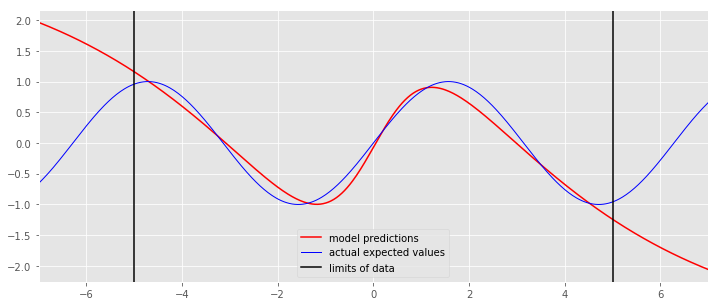

In [48]:
fig,ax = plt.subplots(figsize=(12,5))
plot_results(model_no_dropout, ax=ax)

In [57]:
%%capture
model_activation = keras.models.Sequential()
n_hidden = 25
model_activation.add(keras.layers.Dense(units=n_hidden, 
                                        input_dim=1, 
                                        activation='sigmoid'))
model_activation.add(keras.layers.Dense(units=1))
model_activation.add(keras.layers.Dropout(rate=0.5)) 

model_activation.compile(loss='mean_squared_error',
             optimizer='sgd',
             metrics=['accuracy'])
model_activation.fit(x_train, y_train,
                     epochs=50, batch_size=1, verbose = 0)
fig,ax = plt.subplots(figsize=(12,5))
plot_results(model_activation, ax=ax)

In [58]:
model_activation.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 25)                50        
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 26        
_________________________________________________________________
dropout (Dropout)            (None, 1)                 0         
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________


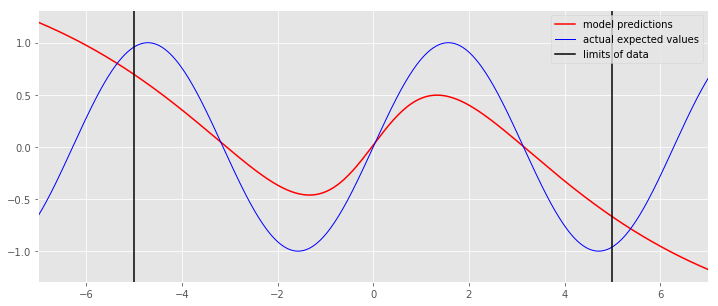

In [59]:
fig,ax = plt.subplots(figsize=(12,5))
plot_results(model_activation, ax=ax)

### L1/L2 Regularization

Another approach to reducing overfitting is the same sort of L1 or L2 regularlization on the connection weights or on the node values; these have similar effect to a linear model. Keras allow `kernel_regularizer` and `activity_regularizer` parameters when creating layers.

### End of Notebook